In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from cProfile import label
import pandas as pd


# Part One: code restrictions.

###
1. this code is only used when the marker axes is in the first two quardrant
2. this code needs you to identify any reflection by the microscope
3. That means, you have to identify your microscope transformation (reflections) so that the y' axis is in the first two qudrant

Below gives a prescripted x-y marker coordinate

No handles with labels found to put in legend.


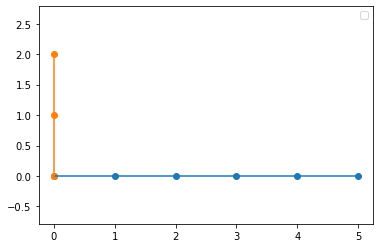

In [2]:
mxx = [0,1,2,3,4,5]
mxy = np.zeros(6)
myx = np.zeros(3)
myy = [0,1,2]

plt.axis('equal')
plt.scatter(mxx, mxy)
plt.scatter(myx, myy)
plt.plot(mxx, mxy)
plt.plot(myx, myy)
plt.legend()

No handles with labels found to put in legend.


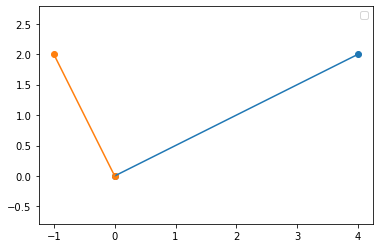

In [3]:
mxx = np.array([0, 4])
mxy = np.array([0, 2])
myx = np.array([0, -1])
myy = np.array([0, 2])  
plt.axis('equal')
plt.scatter(mxx, mxy)
plt.scatter(myx, myy)
plt.plot(mxx, mxy)
plt.plot(myx, myy)
plt.legend()

No handles with labels found to put in legend.


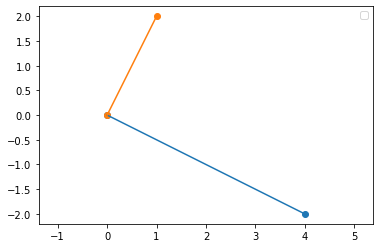

In [4]:
mxx = np.array([0, 4])
mxy = np.array([0, -2])
myx = np.array([0, 1])
myy = np.array([0, 2])  
plt.axis('equal')
plt.scatter(mxx, mxy)
plt.scatter(myx, myy)
plt.plot(mxx, mxy)
plt.plot(myx, myy)
plt.legend()

# Part Two: registration program

In [5]:
axis = pd.read_csv('marker.csv')

hDotsX = axis['xx']
hDotsY = axis['xy']
vDotsX = axis['yx']
vDotsY = axis['yy']

# hDotsX = np.array([0, 2])
# hDotsY = np.array([0, 1])
# vDotsX = np.array([0, -1])
# vDotsY = np.array([0, 2])  

nvx = -1
nvy = 0

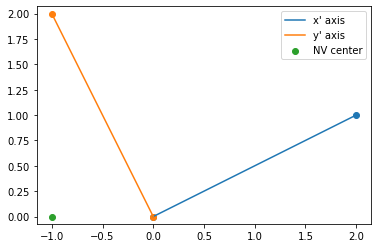

In [6]:
hk, hb = np.polyfit(hDotsX,hDotsY,1)
vk, vb = np.polyfit(vDotsX,vDotsY,1)
zeroX = (hb - vb) / (vk - hk)
zeroY = hk * zeroX + hb

plt.axis('equal')
plt.plot(hDotsX, hDotsX*hk+hb,label = 'x\' axis')
plt.scatter(hDotsX, hDotsY)
plt.plot(vDotsX, vDotsX*vk+vb,label = 'y\' axis')
plt.scatter(vDotsX, vDotsY)
plt.scatter(nvx, nvy, label='NV center')
plt.legend()

#translate the nv coordinate system to the origin
nvx = nvx - zeroX
nvy = nvy - zeroY

#find the angle of rotation
if vk > 0:
    theta = math.atan(vk)
if vk < 0: 
    theta = math.pi - math.atan(-vk)

#find the new marker-coordinates of the NV center
markx = math.sin(theta) * nvx - math.cos(theta) * nvy
marky = math.cos(theta) * nvx + math.sin(theta) * nvy

In [7]:
markx, marky

(-0.8944271909999159, 0.4472135954999579)